<a href="https://colab.research.google.com/github/GWANGHYUNYU/pytorch-tutorial/blob/master/09_2_mnist_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torch.nn as nn
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [18]:
# parameters
training_epochs = 15
batch_size = 100
learning_rate = 0.001

In [19]:
# MNIST dataset
mnist_train = torchvision.datasets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = torchvision.datasets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [20]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [21]:
# MNIST data image of shape 28 * 28 = 784
class MNIST_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(784, 256, bias=True).to(device)
        self.linear2 = torch.nn.Linear(256, 256, bias=True).to(device)
        self.linear3 = torch.nn.Linear(256, 10, bias=True).to(device)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [28]:
# MNIST data image of shape 28 * 28 = 784
class W_I_MNIST_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(784, 256, bias=True).to(device)
        self.linear2 = torch.nn.Linear(256, 256, bias=True).to(device)
        self.linear3 = torch.nn.Linear(256, 10, bias=True).to(device)
        self.relu = torch.nn.ReLU()

        # Weight_Initialization
        torch.nn.init.normal_(self.linear1.weight)
        torch.nn.init.normal_(self.linear2.weight)
        torch.nn.init.normal_(self.linear3.weight)

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [23]:
# Initialization
def init_weights(m):
    if type(m) == nn.Linear1:
        torch.nn.init.normal_(linear1.weight)
        torch.nn.init.normal_(linear2.weight)
        torch.nn.init.normal_(linear3.weight)

In [24]:
net = MNIST_Classifier()

In [25]:
count = 1
for para in net.parameters():
    print(count, "'th layer ", para.size())
    print(para)
    count += 1

1 'th layer  torch.Size([256, 784])
Parameter containing:
tensor([[-2.9863e-02, -6.3304e-04, -6.9076e-03,  ..., -1.8779e-02,
          3.0876e-02, -3.1737e-02],
        [ 6.7273e-03,  2.0005e-02, -2.4505e-02,  ..., -2.7296e-02,
         -3.8136e-03,  1.1463e-03],
        [-1.7847e-02, -2.9822e-02,  7.4012e-05,  ..., -3.2111e-02,
          2.6378e-02,  3.2280e-02],
        ...,
        [-6.6998e-03, -3.3317e-02, -6.8987e-03,  ...,  3.3257e-02,
          3.1245e-02,  3.7429e-03],
        [ 2.8821e-02,  2.5984e-02,  3.5331e-02,  ..., -2.5765e-02,
         -2.5062e-02,  6.3487e-03],
        [ 2.2188e-02, -1.8242e-02,  5.2263e-03,  ...,  3.0406e-02,
         -2.2001e-02, -1.7911e-02]], requires_grad=True)
2 'th layer  torch.Size([256])
Parameter containing:
tensor([ 0.0018, -0.0132, -0.0227, -0.0255,  0.0308,  0.0288, -0.0201,  0.0258,
         0.0337,  0.0178, -0.0159, -0.0091,  0.0232,  0.0081,  0.0028,  0.0300,
        -0.0147, -0.0262, -0.0349,  0.0065, -0.0175, -0.0297,  0.0337, -0.025

In [26]:
net2 = W_I_MNIST_Classifier()

In [27]:
count = 1
for para in net2.parameters():
    print(count, "'th layer ", para.size())
    print(para)
    count += 1

1 'th layer  torch.Size([256, 784])
Parameter containing:
tensor([[-1.1596,  0.4280,  0.7997,  ..., -1.4786,  0.9252,  0.5768],
        [ 0.4508,  0.6853, -0.2222,  ...,  0.8277, -0.9715,  0.5756],
        [-1.0778, -0.5807, -1.7917,  ..., -0.9397, -0.3643, -0.2321],
        ...,
        [ 0.6008, -1.3543,  0.1078,  ...,  0.4966, -0.5438,  0.8466],
        [ 0.1973, -0.0807, -2.5902,  ..., -0.9303, -0.0072, -0.2866],
        [-0.4717,  2.8090, -0.1680,  ..., -0.4490, -0.3798,  0.8595]],
       requires_grad=True)
2 'th layer  torch.Size([256])
Parameter containing:
tensor([-3.4435e-02,  8.2310e-03, -3.4367e-02,  6.2159e-05, -2.3674e-02,
         3.1226e-02, -1.4099e-02,  2.9567e-02, -3.5241e-02, -1.5082e-02,
        -3.0629e-02, -2.7913e-02, -3.4809e-03,  8.5663e-03,  1.8764e-03,
        -5.4471e-03,  1.5817e-02, -2.7542e-02, -2.9589e-02,  2.0178e-03,
         1.2220e-02, -2.6729e-02,  3.9311e-03,  3.1528e-02, -3.1323e-02,
         6.3061e-03, -2.2343e-03, -1.1955e-02,  2.3780e-02, -2.

In [31]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [33]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = net(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.295117170
Epoch: 0002 cost = 0.110606916
Epoch: 0003 cost = 0.072952934
Epoch: 0004 cost = 0.052162699
Epoch: 0005 cost = 0.039112888
Epoch: 0006 cost = 0.031360138
Epoch: 0007 cost = 0.025191443
Epoch: 0008 cost = 0.021900330
Epoch: 0009 cost = 0.017230988
Epoch: 0010 cost = 0.015546730
Epoch: 0011 cost = 0.015122313
Epoch: 0012 cost = 0.014507786
Epoch: 0013 cost = 0.010125137
Epoch: 0014 cost = 0.011617439
Epoch: 0015 cost = 0.008421371
Learning finished


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9783999919891357
Label:  8
Prediction:  8


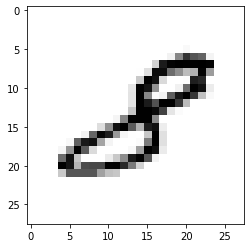

In [35]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = net(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = net(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()